#4-1 로지스틱 회귀


In [ ]:
# 데이터 준비하기

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 첫 번째 열 내용

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- Speciess는 타깃
- 나머지 5개는 특성

In [ ]:
# Species 열에서 고유한 값을 추출 : unique()

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy() # 타깃 데이터

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler # StandardScaler 클래스 : 훈련세트와 테스트세트를 표준화 전처리

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# k-최근접 이웃 분류기의 확률 예측

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) # 이웃 개수 3개
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 타깃 데이터에 2개 이상의 클래스가 포함된 문제 : **다중분류**
- 사이킷런에 문자열로 된 타깃값 그대로 사용 가능
- => 타깃값을 그대로 모델에 전달하면 순서가 자동으로 알파벳 순을 정렬됨

In [ ]:
# 정렬된 타깃값 classes_속성에 저장

print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 테스트 세트에 있는 처음 5개의 샘플 타깃값 예측

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# predict_proba() : 클래스별 확률값 반환
# decimals : 매개변수로 유지할 소수점 아래 자릿수 지정 가능

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 네 번째 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- [0.   0.   0.6667 0.   0.3333  0.   0. ]
- => 첫 번째 열 : bream에 대한 확률 / parkki에 대한 확률

In [ ]:
#계산한 확률이 가장 가까운 이웃의 비율이 맞는가 / 네 번째 샘플의 최근접 이웃 클래스 확인

distnaces, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


- roach가 한 개이고, 세 번째 클래스인 Perch가 2개
- => 다섯 번째 클래스에 대한 확률은 1/3 = 0.3333 / 세 번째 클래스에 대한 확률 2/3 = 0.6667
- 3개의 최근접 이웃을 사용하기 떄문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부


## 로지스틱 회귀
- 분류 모델
- 선형 방정식 학습
- a, b, c, d, e 가중치 or 계수
- z는 어떤 값도 가능하기 때문에 z가 아주 큰 음수일 때 0이 되고, 큰 양수일 때 1이되도록 바꾸는 방법 = **시그모이드 함수 / 로지스틱 함수**



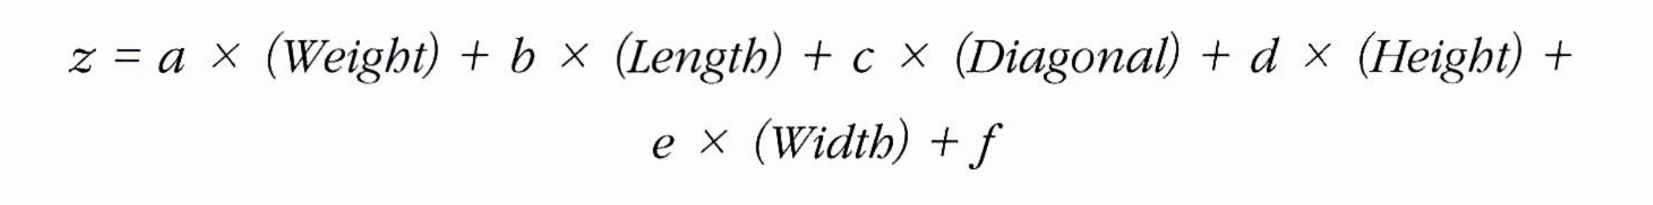

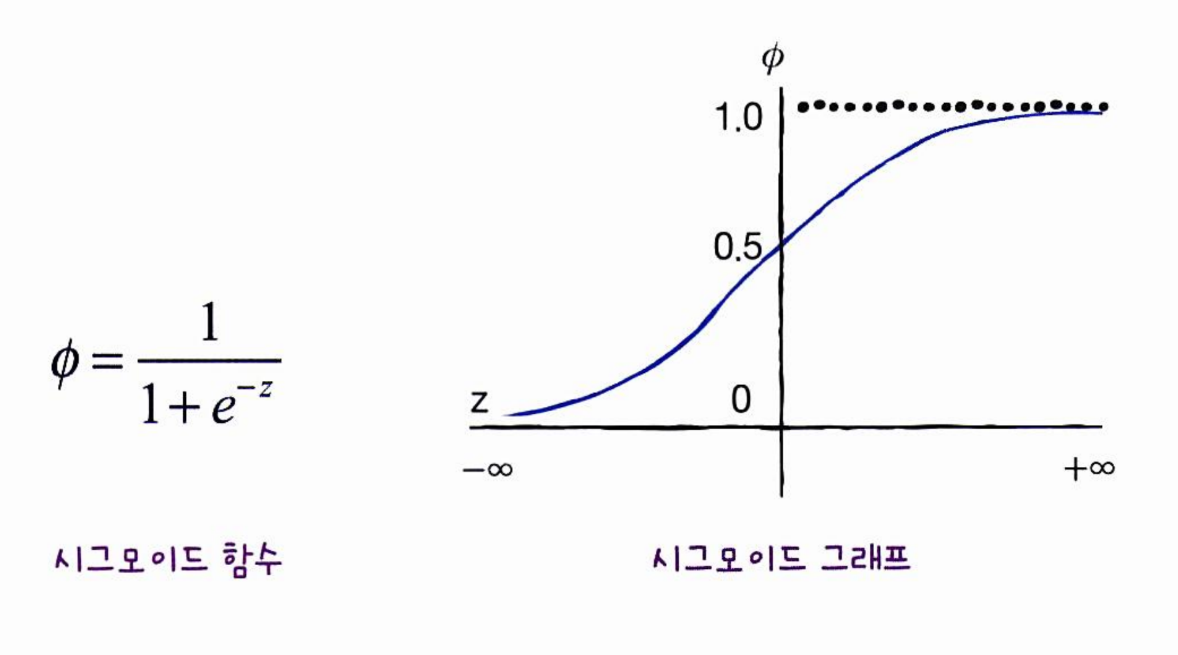

- 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
- => z가 무한하게 큰 음수일 경우 0에 가까워지고, 큰 양수가 될 경우 1에 가까워짐
- z가 0일 때는 0.5가 됨 / z가 어떤 값이 되더라도 0~1사이의 범위를 벗어나지 않음 => 100% 확률로 해석 가능

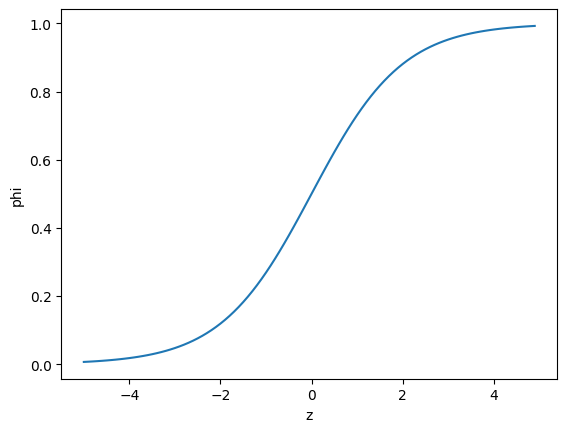

In [17]:
# -5~5 사이의 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그모이드 함수 계산 => np.exp()

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- 0~1까지로 변함
- 로지스틱 회귀 모델 (LogisticRegression 클래스)


## 로지스틱 회귀로 이진 분류 수행하기

- 이진 분류 시 시그모이드 함수 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단

- 넘파이 배열은 True, False 값을 전달하여 행 선택 가능 => **불리언 인덱싱**

In [18]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

print(char_arr[[True, False, True, False, False]])

# A, C만 골라낼 수 있음

['A' 'C']


In [20]:
# 도미, 빙어 행만 골라내기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그 외 모두 False 값이 들어감
- train_scaled / train_target 배열에 불리언 인덱싱을 적용하면 쉽게 도미와 방어 데이터만 골라낼 수 있음

In [23]:
# 로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [24]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [25]:
# 처음 5개의 샘플의 예측 확률 출력

print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- 첫 번째 열이 음성 클래스(0)에 대한 확률
- 두 번재 열이 양성 클래스(1)에 대한 확률
- => 두 번째 열은 양성 클래스인 빙어의 확률이 높음

In [26]:
print(lr.classes_) # 빙어(smelt)가 양성

['Bream' 'Smelt']


In [27]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀가 학습한 계수

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


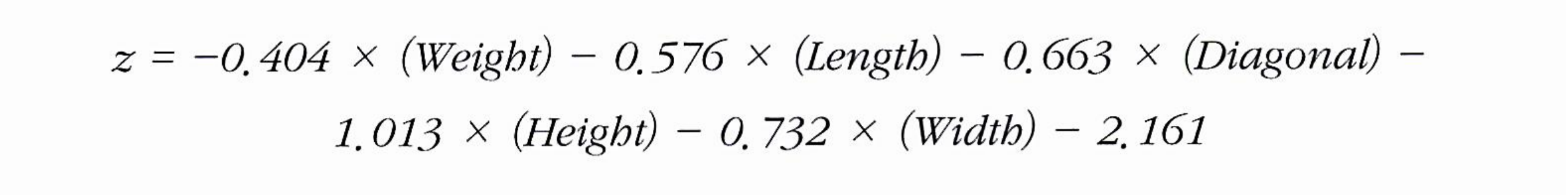

In [30]:
# z 값 출력 : decision_fuction()

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [31]:
#z값을 시그모이드 함수에 통과시키면 함수를 얻을 수 => expit()

from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 위에 predict_proba() 메서드 출력의 두 번째 열의 값과 동일
- decision_fuction() 메서드는 양성 클래스에 대한 z값 반환

## 로지스틱 회귀로 다중 분류 수행하기
- LogisticRegression 클래스 : 반복적인 알고리즘 사용
- max_iter 매개변수에서 반복 횟수를 지정하며 기본값 100
- => 충분한 학습을 위해 반복 횟수 1,000으로 늘림
- 릿지 회귀처럼 계수의 제곱 규제 => **L2 규제**
- 규제를 제어하는 매개변수 C
- => 작을수록 규제가 커지며 기본값 1
- => 규제 완화를 위해 20으로 늘림

In [32]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [33]:
# 테스트 세트의 처음 5개 샘플에 대한 예측

print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [34]:
# 처음 5개 샘플에 대한 예측 확률 출력

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- 7개 생선에 대한 확률 계산 => 7개의 열로 출력
- 첫 번째 샘플을 보면 세 번째 열의 확률이 가장 높음 (농어(perch)에 대한 확률)

In [35]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [36]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 배열의 열 5개, 행이 7개 / intercept_도 7개
- => z를 7개나 계산함 => 다중 분류는 클래스마다 z값을 하나씩 계산 & 가장 높은 z값을 출력하는 클래스가 예측 클래스
- 확률은 **소프트맥스** 함수를 사용해 7개의 z값을 확률로 변환
- **소프트맥스 함수** : 여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 함
- => 지수 함수를 사용하므로 정규화된 지수함수라고도 부름

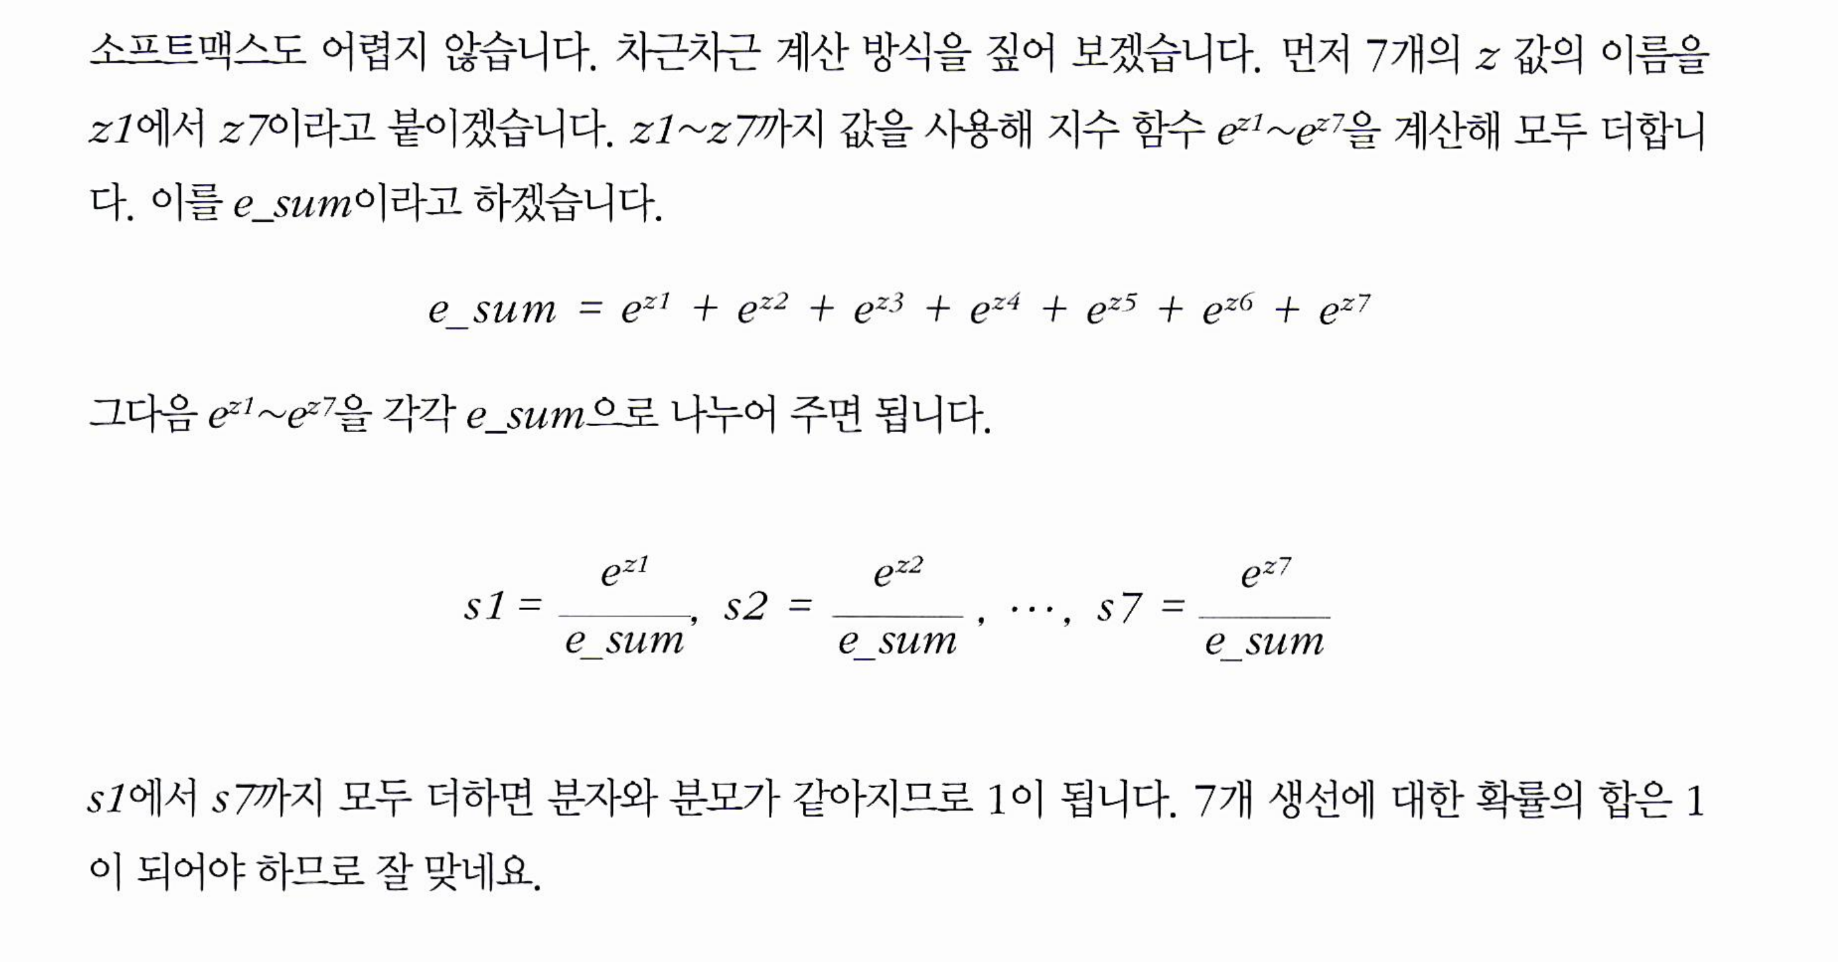

In [39]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [41]:
from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- softmax()의 axis 매개변수는 소프트맥스를 계산할 축 지정
- axis = 1로 지정하여 각 행, 즉 각 샘플에 대한 소프트맥스를 계산
- axis 지정하지 않으면 배열 전체에 대한 소프트맥스를 계산

# 04-2 확률적 경사 하강법

- 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것 : **확률적 경사 하강법**
- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정 : **에포크(epoch)**
- 일반적으로 수십, 수백 번 이상 에포크를 수행
- 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식 : **미니배치 경사 하강법**
- 전체 샘플을 사용하는 것 : **배치 경사 하강법**

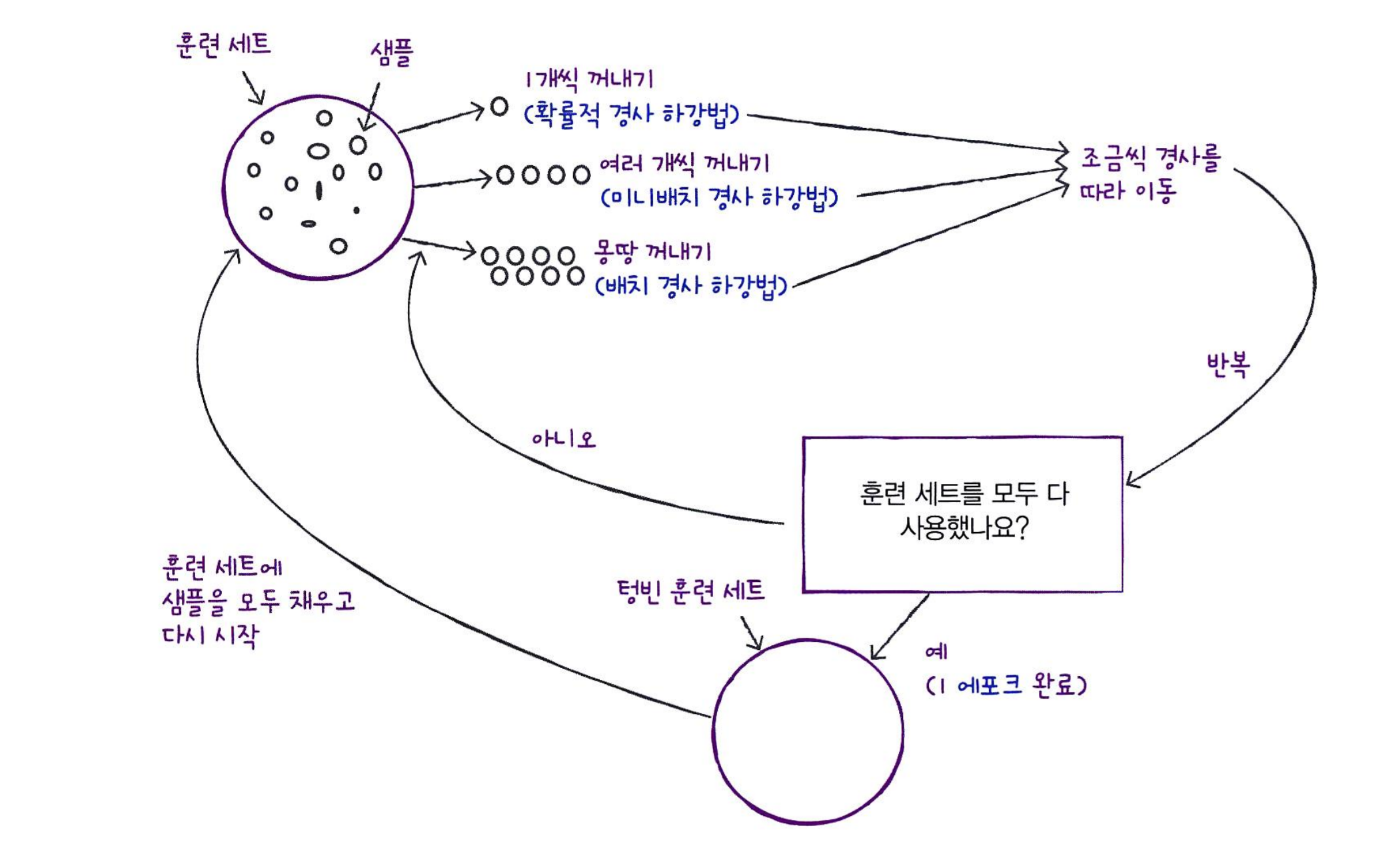

## 손실 함수
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준 : 값이 작을수록 좋음
- 어떤 값이 최소값인지 알 수 없음
- 연속적인 손실 함수를 만들어야 함 => 정확도 사용 불가 / 미분이 가능해야함

## 로지스틱 손실 함수
- 분류에서 손실 = 정답을 못 맞추는 것
- = 이진 크로스엔트로피 손실 함수


- 예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아짐
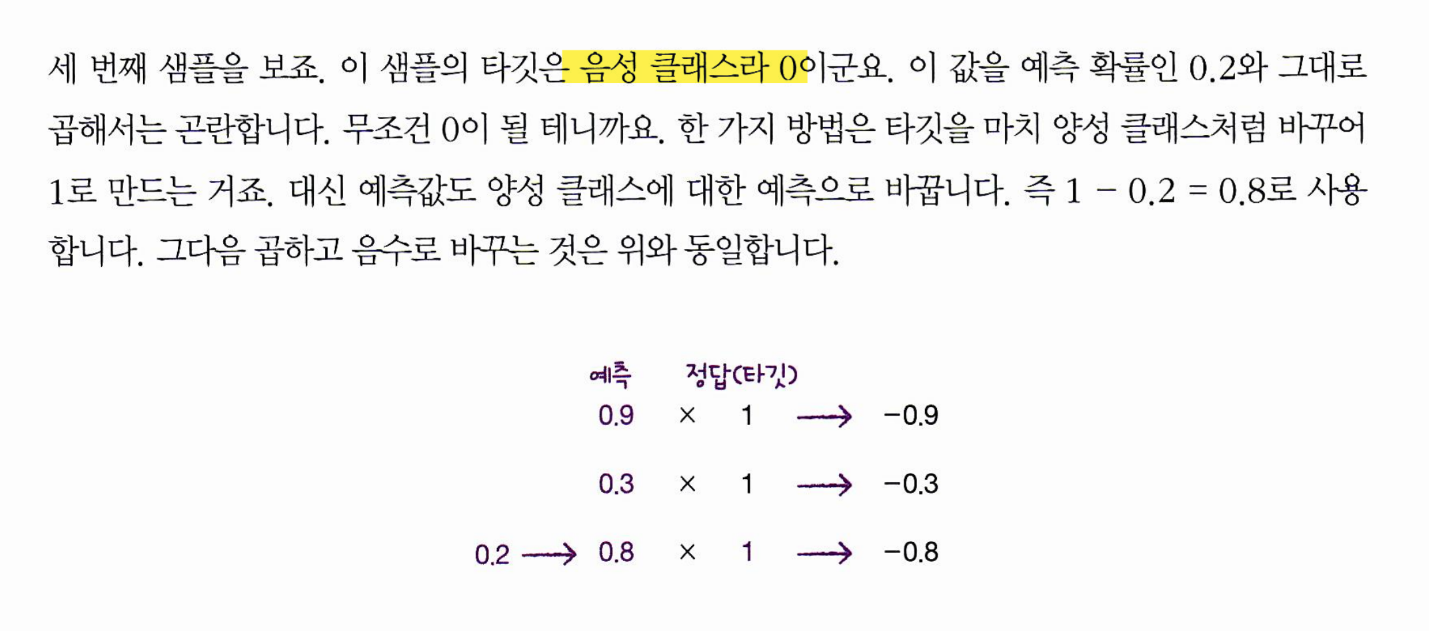

- -0.9 & -0.8가 낮은 손실 / -0.3 & -0.2 높은 손실

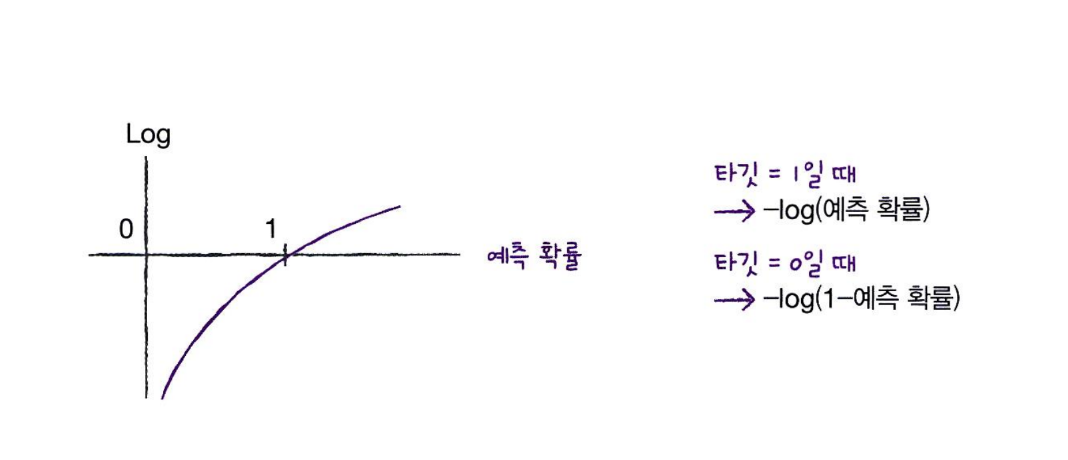

- 로그 함수를 적용하여 최종 손실 값이 양수가 됨
- 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 됨
- 학률이 0에서 멀어질수록 손실은 아주 큰 양수가 됨

- 다중 분류에서 사용하는 손실 함수 :: **크로스엔트로피 손실 함수**


## SGDClassifier

In [42]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [43]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [44]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [45]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [47]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42) # 손실함수의 종류 로지스틱 손실함수로 지정 / max_iter : 수행 할 에포크 횟수 10번
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [48]:
# 훈련한 모델을 추가로 이어 훈련할 때 : partial_fit() / 호출할 때마다 1 에포크씩 이어서 훈련 가능

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합
- 적은 에포크 횟수 동안 훈련한 모델 : 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성 높음
- 많은 에포크 횟수 동안 훈련한 모델 : 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성 높음


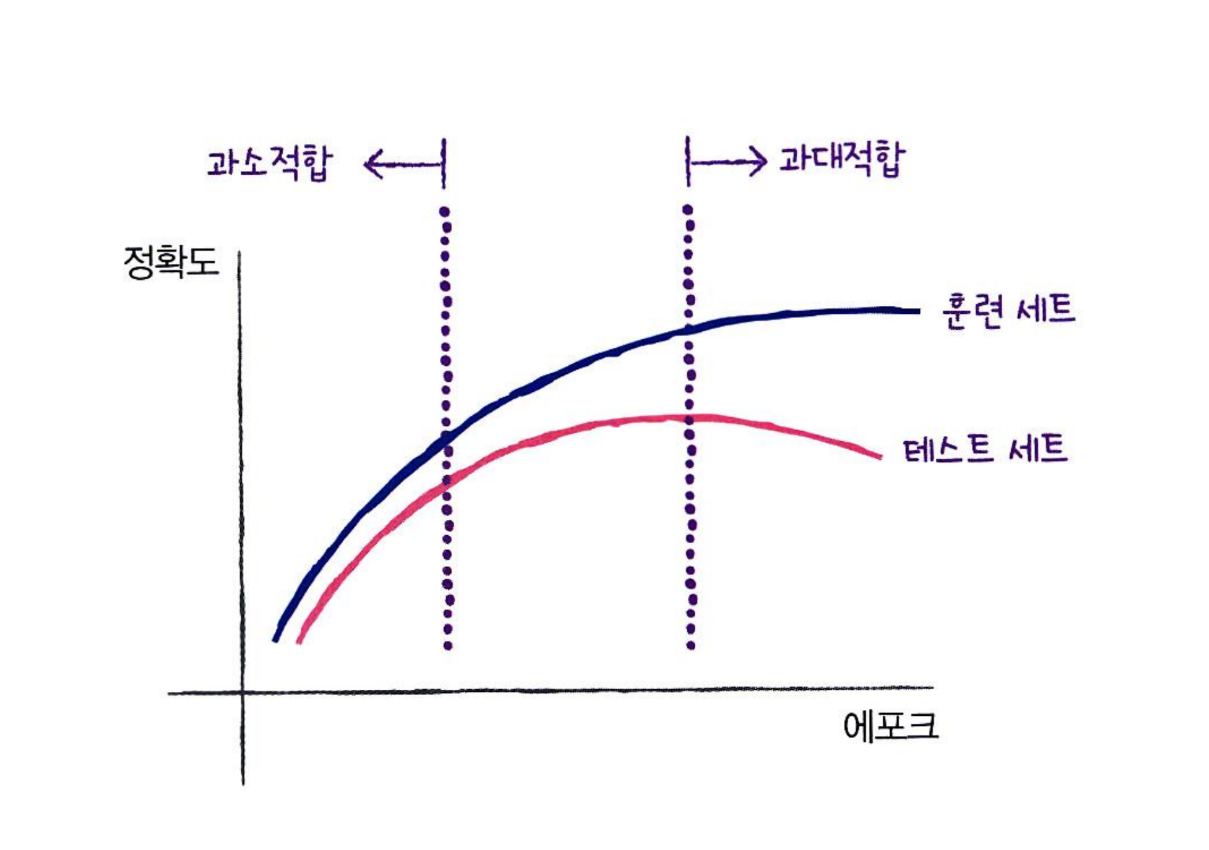

- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 점수는 어느 순간 감소함
- => 이 지점이 과대적합되기 시작하는 곳
- => 과대적합이 시작하기 전 훈련을 멈추는 것 : **조기종료**

In [49]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = [] # 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위한 2개의 리스트
test_score = []
classes = np.unique(train_target) # 7개 생선의 목록을 만듦

In [52]:
# 300번의 에포크 동안 훈련 반복하여 진행

for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


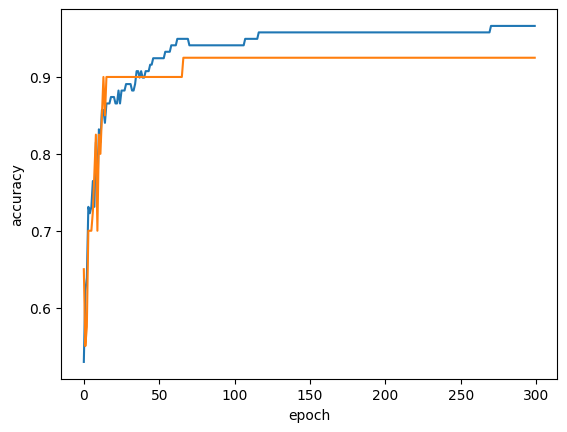

In [53]:
# 훈련 세트와 테스트 세트의 점수 그래프화

import matplotlib.pyplot as lt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 파란색 훈련 세트 그래프 / 빨간색 테스트 세트 그래프
- 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어짐
- 초기에는 과소적합이 되어 훈련 세트와 테스트 세트의 점수가 낮음
- => 백 번의 에포크가 적절한 반복 횟수로 보임

In [55]:
# 반복 횟수 100

sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


- SGDClassifier은 일정 에포크 동안 성능이 향상되지 않으면 훈련을 자동으로 멈춤
- tol 매개변수 : 향상될 최솟값을 지정
- None 지정 : 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복되도록


### SGDClassifier의 loss 매개변수
- loss 매개변수의 기본값은 'hinge'
- 힌지 손실은 서포트 벡터머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수
- 서포트 벡터 머신이 널리 사용하는 머신러닝 알고리즘 중 하나
- SGDClassifier가 여러 종류의 손실 함수를 Loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원


In [57]:
# 힌지 손실로 모델 훈련

sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
